# Load libraries

In [34]:
import numpy as np
import pandas as pd
from pandas import read_csv
from numpy import zeros
from numpy import diag
from sklearn.decomposition import TruncatedSVD
from scipy.sparse import csr_matrix
from scipy.sparse.linalg import svds
from scipy.linalg import svd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from scipy.linalg import svd
from sklearn.decomposition import PCA

from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

import numpy as np  
from numpy import array
from numpy import diag
from numpy import dot
from numpy import zeros
from scipy.linalg import svd

# Data Loading

In [5]:
A_orig=pd.read_csv('audi_2022.csv')

In [6]:
A_orig

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4
1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0
2,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4
3,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0
4,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0
...,...,...,...,...,...,...,...,...,...
10663,A3,2020,16999,Manual,4018,Petrol,145,49.6,1.0
10664,A3,2020,16999,Manual,1978,Petrol,150,49.6,1.0
10665,A3,2020,17199,Manual,609,Petrol,150,49.6,1.0
10666,Q3,2017,19499,Automatic,8646,Petrol,150,47.9,1.4


In [16]:
A_orig_10=pd.read_csv('audi_2022.csv', nrows=10)
A_orig_10

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4
1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0
2,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4
3,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0
4,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0
5,A1,2016,13900,Automatic,32260,Petrol,30,58.9,1.4
6,A6,2016,13250,Automatic,76788,Diesel,30,61.4,2.0
7,A4,2016,11750,Manual,75185,Diesel,20,70.6,2.0
8,A3,2015,10200,Manual,46112,Petrol,20,60.1,1.4
9,A1,2016,12000,Manual,22451,Petrol,30,55.4,1.4


# Checking for missng values


In [10]:
A_orig.isnull().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

# Check the Data type and convert numaric value

In [7]:
pd.factorize(pd.get_dummies(A_orig['model']).columns)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25], dtype=int64),
 Index([' A1', ' A2', ' A3', ' A4', ' A5', ' A6', ' A7', ' A8', ' Q2', ' Q3',
        ' Q5', ' Q7', ' Q8', ' R8', ' RS3', ' RS4', ' RS5', ' RS6', ' RS7',
        ' S3', ' S4', ' S5', ' S8', ' SQ5', ' SQ7', ' TT'],
       dtype='object'))

In [11]:
pd.factorize(pd.get_dummies(A_orig['fuelType']).columns)

(array([0, 1, 2], dtype=int64),
 Index(['Diesel', 'Hybrid', 'Petrol'], dtype='object'))

In [12]:
pd.factorize(pd.get_dummies(A_orig['transmission']).columns)

(array([0, 1, 2], dtype=int64),
 Index(['Automatic', 'Manual', 'Semi-Auto'], dtype='object'))

# A_Original data after One hot encoding

In [18]:
A=pd.read_csv('audi_10.csv')

In [19]:
A

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,0,2017,12500,1,15735,2,150,55.4,1.4
1,5,2016,16500,0,36203,0,20,64.2,2.0
2,0,2016,11000,1,29946,2,30,55.4,1.4
3,3,2017,16800,0,25952,0,145,67.3,2.0
4,2,2019,17300,1,1998,2,145,49.6,1.0
5,0,2016,13900,0,32260,2,30,58.9,1.4
6,5,2016,13250,0,76788,0,30,61.4,2.0
7,3,2016,11750,1,75185,0,20,70.6,2.0
8,2,2015,10200,1,46112,2,20,60.1,1.4
9,0,2016,12000,1,22451,2,30,55.4,1.4


# Singular Value Decomposition (1a)

In [25]:
U,s,VT=svd(A)
Sigma = zeros((A.shape[0], A.shape[1]))
Sigma[:A.shape[1],:A.shape[1]]=diag(s)
B= U.dot(Sigma.dot(VT))

In [26]:
B

array([[-8.94161934e-15,  2.01700000e+03,  1.25000000e+04,
         1.00000000e+00,  1.57350000e+04,  2.00000000e+00,
         1.50000000e+02,  5.54000000e+01,  1.40000000e+00],
       [ 5.00000000e+00,  2.01600000e+03,  1.65000000e+04,
        -1.45668442e-13,  3.62030000e+04,  1.01955683e-15,
         2.00000000e+01,  6.42000000e+01,  2.00000000e+00],
       [ 6.47196219e-15,  2.01600000e+03,  1.10000000e+04,
         1.00000000e+00,  2.99460000e+04,  2.00000000e+00,
         3.00000000e+01,  5.54000000e+01,  1.40000000e+00],
       [ 3.00000000e+00,  2.01700000e+03,  1.68000000e+04,
        -3.25505781e-13,  2.59520000e+04, -1.43906109e-14,
         1.45000000e+02,  6.73000000e+01,  2.00000000e+00],
       [ 2.00000000e+00,  2.01900000e+03,  1.73000000e+04,
         1.00000000e+00,  1.99800000e+03,  2.00000000e+00,
         1.45000000e+02,  4.96000000e+01,  1.00000000e+00],
       [ 1.53577994e-14,  2.01600000e+03,  1.39000000e+04,
        -2.23453196e-13,  3.22600000e+04,  2.000000

# 1b Print the reduced feature transform of  A_original to 3 features

In [31]:
n_elements = 3
Sigma = Sigma[:, :n_elements]
VT = VT[:n_elements, :]
# transform
TX_A = U.dot(Sigma)
print("TX_A")
print(TX_A)

TX_A
[[-1.84751116e+04 -8.15419362e+03 -3.29417582e+02]
 [-3.92687518e+04 -6.69539796e+03  3.29563898e+02]
 [-3.18186610e+04 -3.04017650e+03 -4.01070775e+02]
 [-2.94436003e+04 -9.63492487e+03  2.84018174e+02]
 [-6.43302130e+03 -1.63087160e+04  1.53928353e+02]
 [-3.47952882e+04 -5.22225985e+03 -2.36543095e+01]
 [-7.76411197e+04  6.91535504e+03  2.49696653e+02]
 [-7.57092126e+04  7.93904936e+03  5.10379052e+01]
 [-4.72297077e+04  1.90736244e+03 -3.70741844e+02]
 [-2.48344918e+04 -5.93707014e+03 -3.36806698e+02]]


# 1c 

In [32]:
TX_Recon_A = U.dot(Sigma.dot(VT))

print("TX_Recon_A")
print(TX_Recon_A)

TX_Recon_A
[[-7.43984577e-02  2.01717627e+03  1.25005325e+04  9.94190902e-01
   1.57349134e+04  2.29995304e+00  7.96385328e+01  5.45587342e+01
   1.25256756e+00]
 [ 3.78122921e+00  2.01588535e+03  1.64995144e+04  1.41156075e-01
   3.62030802e+04  3.25423772e-01  8.45952637e+01  6.22632696e+01
   1.80410580e+00]
 [ 4.40401589e-02  2.01593242e+03  1.09998424e+04  1.06004513e+00
   2.99460254e+04  2.18433081e+00  5.07613125e+01  5.63738104e+01
   1.34120705e+00]
 [ 3.22595030e+00  2.01724369e+03  1.68003495e+04  2.14733648e-01
   2.59519454e+04  6.39952949e-01  9.95205113e+01  6.03186959e+01
   1.68642867e+00]
 [ 1.81327546e+00  2.01890861e+03  1.73000866e+04  4.15639572e-01
   1.99798370e+03  1.42969060e+00  1.32857526e+02  5.55766381e+01
   1.39733454e+00]
 [ 1.94445161e+00  2.01591167e+03  1.38996975e+04  5.86864254e-01
   3.22600489e+04  1.24247817e+00  6.98168513e+01  5.92659064e+01
   1.57197361e+00]
 [ 4.72442257e+00  2.01590401e+03  1.32501457e+04  1.75119064e-01
   7.67879738e+04

# 1d	Print explained_variance and how many reduced components you should take 
# PCA

In [42]:
pca = PCA(n_components=3)
pc = pca.fit_transform(A)
print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.cumsum())
print('PCA sum: {:.2f}%'.format(sum(pca.explained_variance_ratio_)*100))
print(pca.components_)

[9.90751760e-01 9.24524841e-03 2.96000376e-06]
[0.99075176 0.99999701 0.99999997]
PCA sum: 100.00%
[[ 4.57205408e-05 -2.76422738e-05 -4.25921866e-02 -4.96076737e-06
   9.99091314e-01 -2.64130346e-05 -1.55401883e-03  1.80671249e-04
   1.05635422e-05]
 [ 5.99893235e-04  2.21948249e-04  9.99063136e-01 -1.53751103e-04
   4.26025108e-02 -2.94370761e-04  7.52675808e-03  8.36431213e-04
   6.92532569e-05]
 [-9.19954236e-04  1.00680600e-02 -7.59568116e-03  2.51117366e-03
   1.22986158e-03 -2.58703558e-03  9.99862796e-01  9.98767239e-03
   4.66361615e-04]]


#  1e Plot the first two PCA_Components 

[0.99075176 0.00924525]


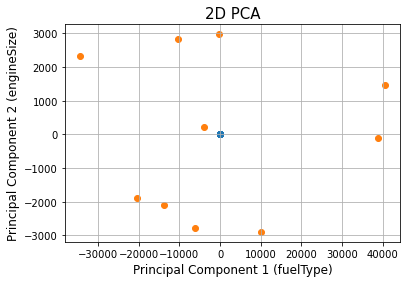

In [45]:
pca = PCA(n_components=2)
pc = pca.fit_transform(A)
print(pca.explained_variance_ratio_)
ddd = pca.fit(A)

correlations =A.corr(method = 'pearson')
correlations

fig, ax = plt.subplots()
plt.scatter(A['fuelType'], A['engineSize'])
plt.scatter(pc[:, 0], pc[:, 1])
plt.xlabel('Principal Component 1 (fuelType)', fontsize = 12)
plt.ylabel('Principal Component 2 (engineSize)', fontsize = 12)
plt.title('2D PCA', fontsize = 15)
plt.grid()
plt.show()

# 1f

In [88]:
X = A_orig.iloc[:,[0,1,3,4,5,6,7,8]].values
Y = A_orig.iloc[:,[2]].values
print(X)

[[' A1' 2017 'Manual' ... 150 55.4 1.4]
 [' A6' 2016 'Automatic' ... 20 64.2 2.0]
 [' A1' 2016 'Manual' ... 30 55.4 1.4]
 ...
 [' A3' 2020 'Manual' ... 150 49.6 1.0]
 [' Q3' 2017 'Automatic' ... 150 47.9 1.4]
 [' Q3' 2016 'Manual' ... 150 47.9 1.4]]


In [89]:
from sklearn.preprocessing import LabelEncoder
le1 = LabelEncoder()
X[:,0] = le1.fit_transform(X[:,0])
le2 = LabelEncoder()
X[:,2] = le2.fit_transform(X[:,2])
le2 = LabelEncoder()
X[:,4] = le1.fit_transform(X[:,4])
le3 = LabelEncoder()

In [90]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

ct = ColumnTransformer(transformers =[('encoder',OneHotEncoder(),[])], remainder = 'passthrough')
X = ct.fit_transform(X)
#print(X)

In [91]:
# Importing standardscalar module
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
scalar = StandardScaler()
 
# fitting
scalar.fit(X)
scaled_data = scalar.transform(X)

# Importing PCA

In [92]:
from sklearn.decomposition import PCA 
# components = 2
pca = PCA(n_components = 2)
pca.fit(scaled_data)
x_pca = pca.transform(scaled_data)

In [93]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train,  Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 2)

In [94]:
from sklearn.ensemble import RandomForestRegressor
regression = RandomForestRegressor(random_state=0)
regression.fit(X_train,Y_train)
y_pred = regression.predict(X_test)


C:\Users\myneee101\AppData\Local\Temp/ipykernel_14596/336640023.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regression.fit(X_train,Y_train)


In [95]:
from sklearn import metrics
error_score = metrics.r2_score(Y_test, y_pred)
print("R2 score:", error_score)

R2 score: 0.9570761974561195


# Singular-value decomposition (SVD)

In [96]:
from sklearn.preprocessing import StandardScaler
from numpy import zeros
sc = StandardScaler()
X = sc.fit_transform(X)
U, s, VT = svd(X)
# create m x n Sigma matrix
Sigma = zeros((X.shape[0], X.shape[1]))
Sigma[:X.shape[1], :X.shape[1]] = diag(s)
n_elements = 3
Sigma = Sigma[:, :n_elements]
VT = VT[:n_elements, :]
B = U.dot(Sigma.dot(VT))
X = B;

In [99]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train,  Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 2)

In [100]:
from sklearn.ensemble import RandomForestRegressor
regression = RandomForestRegressor(random_state=0)
regression.fit(X_train,Y_train)
y_pred = regression.predict(X_test)

C:\Users\myneee101\AppData\Local\Temp/ipykernel_14596/2572803462.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regression.fit(X_train,Y_train)


In [101]:
from sklearn import metrics
error_score = metrics.r2_score(Y_test, y_pred)
print("R2 score:", error_score)

R2 score: 0.9358828692364838


# Q2 Fill in the blanks The dataset has non-linearity between attributes. 

# Q 2.1

In [221]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import precision_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
X = A_orig.iloc[:,[0,1,3,4,5,6,7,8]].values
Y = A_orig.iloc[:,[2]].values
from sklearn.preprocessing import LabelEncoder
le1 = LabelEncoder()
X[:,0] = le1.fit_transform(X[:,0])
le2 = LabelEncoder()
X[:,2] = le2.fit_transform(X[:,2])
le2 = LabelEncoder()
X[:,4] = le1.fit_transform(X[:,5])
le3 = LabelEncoder()

In [222]:
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=0.2, random_state=10)
model_LR=LinearRegression().fit(X_train, Y_train)
predicted_LR=model_LR.predict(X_validation)
X_validation_for_Price = [[3, 2018, 2, 15207, 2, 143, 50, 1.4]]
predicted_LR_for_Price =model_LR.predict(X_validation_for_Price)
print(predicted_LR_for_Price)
r2_price = r2_score(Y_validation, predicted_LR)
print('r2 score for price prediction is', r2_price)

mae_LR_price = mean_absolute_error(Y_validation, predicted_LR)
print("Mean absolute error for LR_price: ", mae_LR_price)

[[20854.79026247]]
r2 score for price prediction is 0.7914362598897042
Mean absolute error for LR_price:  3352.4454402321676


# Q 2.2

In [247]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import precision_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
X = A_orig.iloc[:,[0,1,2,3,4,5,6,8]].values
Y = A_orig.iloc[:,[7]].values
from sklearn.preprocessing import LabelEncoder
le1 = LabelEncoder()
X[:,0] = le1.fit_transform(X[:,0])
le2 = LabelEncoder()
X[:,3] = le2.fit_transform(X[:,3])
le2 = LabelEncoder()
X[:,5] = le1.fit_transform(X[:,5])
le3 = LabelEncoder()

In [249]:
from sklearn.preprocessing import PolynomialFeatures
X_poly=PolynomialFeatures(degree=2, include_bias=False).fit_transform(X)
X_train_poly, X_validation_poly, Y_train_poly, Y_validation_poly = train_test_split(X_poly, Y, test_size=0.20, random_state=10)
model_poly=LinearRegression().fit(X_train_poly, Y_train_poly)
predicted_poly=model_poly.predict(X_validation_poly)
X_validation_for_mpg_2 = [[10, 2019, 30000, 2, 49000, 0, 250, 3.0]]
predicted_poly_for_mpg =model_LR.predict(X_validation_for_mpg_2)
print(predicted_poly_for_mpg)

r2_mpg_2 = r2_score(Y_validation_poly, predicted_poly)
print('r2 score for mpg prediction is', r2_mpg_2)

mae_poly = mean_absolute_error(Y_validation_poly, predicted_poly)
print("Mean absolute error for poly_MPG: ", mae_poly)

[[39.2854062]]
r2 score for mpg prediction is 0.8866731114545826
Mean absolute error for poly_MPG:  3.1939831351598524


# Q 2.3

In [254]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import precision_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
X = A_orig.iloc[:,[0,1,2,3,4,5,6,8]].values
Y = A_orig.iloc[:,[7]].values
from sklearn.preprocessing import LabelEncoder
le1 = LabelEncoder()
X[:,0] = le1.fit_transform(X[:,0])
le2 = LabelEncoder()
X[:,3] = le2.fit_transform(X[:,3])
le2 = LabelEncoder()
X[:,5] = le1.fit_transform(X[:,5])
le3 = LabelEncoder()

In [255]:
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=0.2, random_state=10)
model_LR=LinearRegression().fit(X_train, Y_train)
predicted_LR=model_LR.predict(X_validation)
X_validation_for_mpg = [[10, 2019, 30000, 2, 49000, 0, 251, 3.0]]
predicted_LR_for_mpg =model_LR.predict(X_validation_for_mpg)
print(predicted_LR_for_mpg)
r2_mpg = r2_score(Y_validation, predicted_LR)
print('r2 score for mpg prediction is', r2_mpg)
mae_LR_mpg = mean_absolute_error(Y_validation, predicted_LR)
print("Mean absolute error for LR_MPG: ", mae_LR_mpg)

[[39.20829112]]
r2 score for mpg prediction is 0.6458433194231914
Mean absolute error for LR_MPG:  4.441279429938717


# Q 4 Satellite Dataset 

In [269]:
import pandas as pd
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
ind = list(range(37))

# Data Load

In [270]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/satimage/sat.tst"
data=pd.read_csv(url,delimiter=' ',names = ind)
samples,features = df.shape

# Define dataset

In [271]:
X=data.iloc[:,0:features-1]
y=data.iloc[:,features-1]

# Change clock value to find the Parameters used for Tuning

In [272]:
clk =0
if clk == 1:
    LogisticRegression(X,y)
elif clk == 2:
    KNeighborsClassifier(X,y)
elif clk == 3:
    SVC(X,y)
elif clk == 4:  
    RandomForestClassifier(X,y)      
elif clk == 5:
    GaussianNB(X,y)

# Training the model

In [273]:
train = 1
if train == 1 :
    X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.20, random_state=1, shuffle=True)        
    models = []
    # Change these value accoarding the tuning parameter
    models.append(('NB', GaussianNB(var_smoothing=0.0008111308307896872)))
    models.append(('RF', RandomForestClassifier(max_features= 'sqrt',n_estimators= 1000)))
    models.append(('SVM', SVC(C=10,gamma ='scale',kernel='rbf')))   
    models.append(('KNN', KNeighborsClassifier(metric='manhattan',n_neighbors=3,weights='distance')))
    models.append(('LR', LogisticRegression(C=0.01,penalty='l2',solver='newton-cg',)))
    #------------   
    results = []
    names = []
    print('\n-------------Training Result----------')
    rkfold = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)

    for name, model in models:
        cv_results = cross_val_score(model, X_train, Y_train, cv=rkfold, scoring='accuracy')
        results.append(cv_results)
        names.append(name)
        y_train_pred = cross_val_predict(model, X_train, Y_train, cv=kfold)
        ps = precision_score(Y_train, y_train_pred,average = 'weighted')
        
        cfm = confusion_matrix(Y_train, y_train_pred)
        FP = cfm.sum(axis=0) - np.diag(cfm)  
        FN = cfm.sum(axis=1) - np.diag(cfm)
        TP = np.diag(cfm)
        TN = cfm.sum() - (FP + FN + TP)
        FNR = np.mean(FN/(TP+FN))
                    
        print('%s: %f (%f) K-accuracy: %f FAR: %f' % (name, cv_results.mean(), cv_results.std(),ps,FNR)) 


-------------Training Result----------
NB: 0.796042 (0.023853) K-accuracy: 0.816448 FAR: 0.209532
RF: 0.893125 (0.026632) K-accuracy: 0.890066 FAR: 0.127825
SVM: 0.892500 (0.018985) K-accuracy: 0.889103 FAR: 0.124815
KNN: 0.885833 (0.023270) K-accuracy: 0.884871 FAR: 0.130443


C:\Users\myneee101\anaconda3\lib\site-packages\sklearn\utils\optimize.py:202: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn("newton-cg failed to converge. Increase the "
C:\Users\myneee101\anaconda3\lib\site-packages\sklearn\utils\optimize.py:202: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn("newton-cg failed to converge. Increase the "
C:\Users\myneee101\anaconda3\lib\site-packages\sklearn\utils\optimize.py:202: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn("newton-cg failed to converge. Increase the "
C:\Users\myneee101\anaconda3\lib\site-packages\sklearn\utils\optimize.py:202: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn("newton-cg failed to converge. Increase the "
C:\Users\myneee101\anaconda3\lib\site-packages\sklearn\utils\optimize.py:202: ConvergenceWarning: ne

LR: 0.847708 (0.020122) K-accuracy: 0.840235 FAR: 0.187561


C:\Users\myneee101\anaconda3\lib\site-packages\sklearn\utils\optimize.py:202: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn("newton-cg failed to converge. Increase the "


# Q5 Using kangaroo images to classify between humans, background and scenery


In [352]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import cv2
import os
from skimage.io import imread, imshow
import matplotlib.pyplot as plt
from skimage.transform import resize
from sklearn.model_selection import cross_val_score

In [360]:
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        if filename.endswith(".jpg"):
            img = cv2.imread(os.path.join(folder, filename))
            if img is not None:
                images.append(img)
    return images
#defining the path that is used to access the image folders
root_folder = r"C:\Users\myneee101\kangaroo_master\kangaroo-master\train_image"

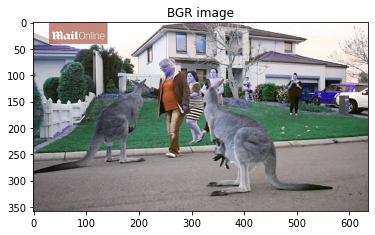

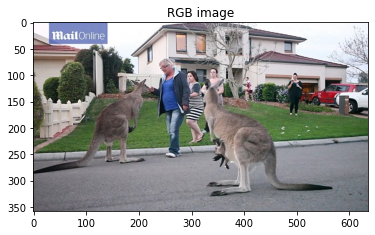

In [362]:
kang_images = load_images_from_folder(root_folder)
kang_RGB=[]
for i in range(len(kang_images)):
    kang_rgb=cv2.cvtColor(kang_images[i], cv2.COLOR_BGR2RGB)
    kang_RGB.append(kang_rgb)
#displaying image as example
plt.imshow(kang_images[4])
plt.title('BGR image')
plt.show()

plt.imshow(kang_RGB[4])
plt.title('RGB image')
plt.show()

ValueError: zero-size array to reduction operation minimum which has no identity

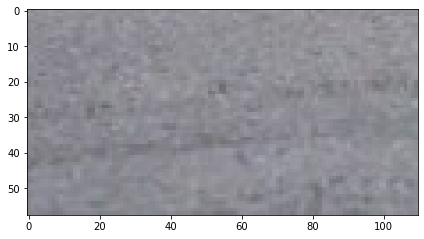

In [389]:
#cropping kangaroo patches from some of the images
k_patches = []
img = kang_RGB[4]
k_patch = img[300:550,190:300]
imshow(k_patch)
k_patches.append(k_patch)
k_patch = img[290:420, 710:840]
imshow(k_patch)
k_patches.append(k_patch)
k_patch = img[360:500, 530:700]
imshow(k_patch)
k_patches.append(k_patch)
img = kang_RGB[4]
imshow(img)
k_patch = img[0:320, 140:200]
imshow(k_patch)
k_patches.append(k_patch)
k_patch = img[150:260, 420:640]
imshow(k_patch)
k_patches.append(k_patch)
img = kang_RGB[4]
imshow(img)
k_patch = img[200:550, 680:760]
imshow(k_patch)
k_patches.append(k_patch)
img = kang_RGB[4]
imshow(img)
k_patch = img[520:640, 340:420]
imshow(k_patch)
k_patches.append(k_patch)

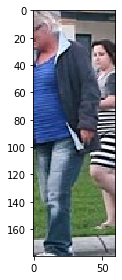

In [364]:
#cropping human patched from some images
h_patches = []
img = kang_RGB[6]
imshow(img)
h_patch = img[50:550, 40:180]
imshow(h_patch)
h_patches.append(h_patch)
img = kang_RGB[4]
imshow(img)
h_patch = img[110:370, 430:500]
imshow(h_patch)
h_patches.append(h_patch)
img = kang_RGB[6]
imshow(img)
h_patch = img[210:600, 150:280]
imshow(h_patch)
h_patches.append(h_patch)
img = kang_RGB[4]
imshow(img)
h_patch = img[70:250, 250:310]
imshow(h_patch)
h_patches.append(h_patch)

ValueError: zero-size array to reduction operation minimum which has no identity

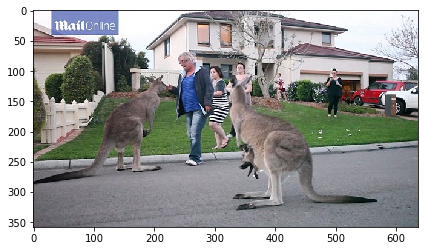

In [391]:
#cropping scenery patches from some images
s_patches = []
img = kang_RGB[4]
imshow(img)
s_patch = img[500:610, 0:1000]
imshow(s_patch)
s_patches.append(s_patch)
img = kang_RGB[4]
imshow(img)
s_patch = img[0:250, 250:850]
imshow(s_patch)
s_patches.append(s_patch)
img = kang_RGB[4]
imshow(img)
s_patch = img[0:150, 0:150]
imshow(s_patch)
s_patches.append(s_patch)
img = kang_RGB[4]
imshow(img)
s_patch = img[0:50, 200:620]
imshow(s_patch)
s_patches.append(s_patch)
img = kang_RGB[4]
imshow(img)
s_patch = img[450:650, 0:620]
imshow(s_patch)
s_patches.append(s_patch)

In [369]:
#Looping over the kangaroo patches to extract kangaroo information
k_red = []
k_green = []
k_blue = []

for l in range(len(k_patches)):
    img = k_patches[l]
    img = resize(img, (30,30))
    for i in range(0, 30, 3):
        for j in range (0, 30, 3):
            p = img[j:j+3,i:i+3]
            red = np.reshape(p[:,:,0], -1)
            k_red.append(red)
            green = np.reshape(p[:,:,1], -1)
            k_green.append(green)
            blue = np.reshape(p[:,:,2], -1)
            k_blue.append(blue)

In [370]:
#Looping over the human patches to extract human information
h_red = []
h_green = []
h_blue = []

for l in range(len(h_patches)):
    img = h_patches[l]
    img = resize(img, (30,30))
    for i in range(0, 30, 3):
        for j in range (0, 30, 3):
            p = img[j:j+3,i:i+3]
            red = np.reshape(p[:,:,0], -1)
            h_red.append(red)
            green = np.reshape(p[:,:,1], -1)
            h_green.append(green)
            blue = np.reshape(p[:,:,2], -1)
            h_blue.append(blue)

In [372]:
#calculating mean values
red_k_mean = []
green_k_mean = []
blue_k_mean = []
red_h_mean = []
green_h_mean = []
blue_h_mean = []
red_s_mean = []
green_s_mean = []
blue_s_mean = []

for i in range(len(k_red)):
    rmean = np.mean(k_red[i])
    red_k_mean.append(rmean)
    gmean = np.mean(k_green[i])
    green_k_mean.append(gmean)
    bmean = np.mean(k_blue[i])
    blue_k_mean.append(bmean)
for i in range(len(h_red)):
    rmean = np.mean(h_red[i])
    red_h_mean.append(rmean)
    gmean = np.mean(h_green[i])
    green_h_mean.append(gmean)
    bmean = np.mean(h_blue[i])
    blue_h_mean.append(bmean)
for i in range(len(s_red)):
    rmean = np.mean(s_red[i])
    red_s_mean.append(rmean)
    gmean = np.mean(s_green[i])
    green_s_mean.append(gmean)
    bmean = np.mean(s_blue[i])
    blue_s_mean.append(bmean)

In [373]:
#calculating std dev values
red_k_std = []
green_k_std = []
blue_k_std = []
red_h_std = []
green_h_std = []
blue_h_std = []
red_s_std = []
green_s_std = []
blue_s_std = []

for i in range(len(k_red)):
    rmean = np.std(k_red[i])
    red_k_std.append(rmean)
    gmean = np.std(k_green[i])
    green_k_std.append(gmean)
    bmean = np.std(k_blue[i])
    blue_k_std.append(bmean)
for i in range(len(h_red)):
    rmean = np.std(h_red[i])
    red_h_std.append(rmean)
    gmean = np.std(h_green[i])
    green_h_std.append(gmean)
    bmean = np.std(h_blue[i])
    blue_h_std.append(bmean)
for i in range(len(s_red)):
    rmean = np.std(s_red[i])
    red_s_std.append(rmean)
    gmean = np.std(s_green[i])
    green_s_std.append(gmean)
    bmean = np.std(s_blue[i])
    blue_s_std.append(bmean)

In [374]:
#calculating variance values
red_k_var = []
green_k_var = []
blue_k_var = []
red_h_var = []
green_h_var = []
blue_h_var = []
red_s_var = []
green_s_var = []
blue_s_var = []

for i in range(len(k_red)):
    rmean = np.var(k_red[i])
    red_k_var.append(rmean)
    gmean = np.var(k_green[i])
    green_k_var.append(gmean)
    bmean = np.var(k_blue[i])
    blue_k_var.append(bmean)
for i in range(len(h_red)):
    rmean = np.var(h_red[i])
    red_h_var.append(rmean)
    gmean = np.var(h_green[i])
    green_h_var.append(gmean)
    bmean = np.var(h_blue[i])
    blue_h_var.append(bmean)
for i in range(len(s_red)):
    rmean = np.var(s_red[i])
    red_s_var.append(rmean)
    gmean = np.var(s_green[i])
    green_s_var.append(gmean)
    bmean = np.var(s_blue[i])
    blue_s_var.append(bmean)

# KNN

In [377]:

clf2 = KNeighborsClassifier(n_neighbors=4, weights='distance', metric='euclidean')
clf2.fit(X_train, Y_train)
Y_pred = clf2.predict(X_validation)
CM = confusion_matrix(Y_validation, Y_pred)
FP = CM.sum(axis=0) - np.diag(CM)  
FN = CM.sum(axis=1) - np.diag(CM)
TP = np.diag(CM)
TN = CM.sum() - (FP + FN + TP)
# False discovery rate
FDR = FP/(TP+FP)
FDR = FDR[~np.isnan(FDR)]
#average false positive rate for all classes
avgFDRknn = FDR.sum()/len(FDR)
#10-fold cross validation
scores2 = cross_val_score(clf2, X_train, Y_train, cv=10)
print("KNN 10-fold cross validation: ")
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores2.mean(), scores2.std()))
print("KNN false alarm rate: ", avgFDRknn)

KNN 10-fold cross validation: 
0.89 accuracy with a standard deviation of 0.03
KNN false alarm rate:  0.11069799641126925


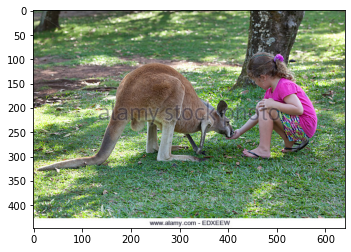

In [380]:
#applying the algorithms on an image
#reading test images
img11 = cv2.imread(r"C:\Users\myneee101\kangaroo_master\kangaroo-master\test_image\11.jpg")
img12 = cv2.imread(r"C:\Users\myneee101\kangaroo_master\kangaroo-master\test_image\12.jpg")
img11 = cv2.cvtColor(img11, cv2.COLOR_BGR2RGB)
img12 = cv2.cvtColor(img12, cv2.COLOR_BGR2RGB)
plt.imshow(img11)
plt.show()